In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'deepfake-detection-challenge:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F16880%2F858837%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240516%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240516T225200Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D251a888b31095be6e9d6034db38e835662e05c948de3806fbee06633b711e63e0782de10fa4f7e23f434d3c70a238f8bfeb8ee2242cccd435ca88d4db69023effff236e9801a4fd7ea43f9136fbcc47ddec0143b9d05e8b78c4679856d84cc0bb9051bfd4a4d6daab390b0663811ed798c9cfe336baa9647146c0a76d810c30a2ede252b4a766786465638013f7425e841653f3a1000b896c6ff68dce5ca6aac48192bbd5a345dced7df31a417572e7fd3bab4e258a4c19f6d93e8246a387b00f55ff272ae3288edcdb53462b2b61956b7cbd48242870f48326a77c4054977fccab9494ba94a198db47445e6540eae868701cdc55d78fed4711ce5db123c895e'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
''' This Python 3 environment comes with many helpful analytics libraries installed
It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
Input data files are available in the read-only "../input/" directory
For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory'''

import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/deepfake-detection-challenge/sample_submission.csv
/kaggle/input/deepfake-detection-challenge/test_videos/qooxnxqqjb.mp4
/kaggle/input/deepfake-detection-challenge/test_videos/hierggamuo.mp4
/kaggle/input/deepfake-detection-challenge/test_videos/ocgdbrgmtq.mp4
/kaggle/input/deepfake-detection-challenge/test_videos/icbsahlivv.mp4
/kaggle/input/deepfake-detection-challenge/test_videos/prhmixykhr.mp4
/kaggle/input/deepfake-detection-challenge/test_videos/ihglzxzroo.mp4
/kaggle/input/deepfake-detection-challenge/test_videos/yarpxfqejd.mp4
/kaggle/input/deepfake-detection-challenge/test_videos/orixbcfvdz.mp4
/kaggle/input/deepfake-detection-challenge/test_videos/qxyrtwozyw.mp4
/kaggle/input/deepfake-detection-challenge/test_videos/hqzwudvhih.mp4
/kaggle/input/deepfake-detection-challenge/test_videos/ghnpsltzyn.mp4
/kaggle/input/deepfake-detection-challenge/test_videos/ziipxxchai.mp4
/kaggle/input/deepfake-detection-challenge/test_videos/fddmkqjwsh.mp4
/kaggle/input/deepfake-de

!pip install dlib

In [ ]:
pip install dlib==19.22.0

     |████████████████████████████████| 7.4MB 4.4MB/s eta 0:00:01
  Created wheel for dlib: filename=dlib-19.22.0-cp36-cp36m-linux_x86_64.whl size=4288603 sha256=cadc6c2c61e75baa8b59ff0569c889778ea54f6134b288a91b442ca1ad8f4159
  Stored in directory: /root/.cache/pip/wheels/bd/46/7c/deeb33803394006488f2378a9adeae08c65c9560f27a85fbce
Successfully built dlib
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import dlib
import cv2
import os
import re
import json
from pylab import *
from PIL import Image, ImageChops, ImageEnhance

In [ ]:
#os.mkdir('/kaggle/working/dataset')
os.mkdir('/kaggle/working/dataset/real')
os.mkdir('/kaggle/working/dataset/fake')

FileExistsError: [Errno 17] File exists: '/kaggle/working/dataset'

In [ ]:
train_frame_folder = '/kaggle/input/deepfake-detection-challenge/train_sample_videos'
with open(os.path.join(train_frame_folder, 'metadata.json'), 'r') as file:
    data = json.load(file)
list_of_train_data = [f for f in os.listdir(train_frame_folder) if f.endswith('.mp4')]
detector = dlib.get_frontal_face_detector()
for vid in list_of_train_data:
    count = 0
    cap = cv2.VideoCapture(os.path.join(train_frame_folder, vid))
    frameRate = cap.get(5)
    while cap.isOpened():
        frameId = cap.get(1)
        ret, frame = cap.read()
        if ret != True:
            break
        if frameId % ((int(frameRate)+1)*1) == 0:
            face_rects, scores, idx = detector.run(frame, 0)
            for i, d in enumerate(face_rects):
                x1 = d.left()
                y1 = d.top()
                x2 = d.right()
                y2 = d.bottom()
                crop_img = frame[y1:y2, x1:x2]
                if data[vid]['label'] == 'REAL':
                    cv2.imwrite('/kaggle/working/dataset/real/'+vid.split('.')[0]+'_'+str(count)+'.png', cv2.resize(crop_img, (128, 128)))
                elif data[vid]['label'] == 'FAKE':
                    cv2.imwrite('/kaggle/working/dataset/fake/'+vid.split('.')[0]+'_'+str(count)+'.png', cv2.resize(crop_img, (128, 128)))
                count+=1

In [ ]:
import os
import cv2
import json
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
input_shape = (128, 128, 3)
data_dir = '/kaggle/working/dataset'

real_data = [f for f in os.listdir(data_dir+'/real') if f.endswith('.png')]
fake_data = [f for f in os.listdir(data_dir+'/fake') if f.endswith('.png')]

X = []
Y = []

for img in real_data:
    X.append(img_to_array(load_img(data_dir+'/real/'+img)).flatten() / 255.0)
    Y.append(1)
for img in fake_data:
    X.append(img_to_array(load_img(data_dir+'/fake/'+img)).flatten() / 255.0)
    Y.append(0)

Y_val_org = Y

X = np.array(X)
Y = to_categorical(Y, 2)

X = X.reshape(-1, 128, 128, 3)

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [ ]:
print(Y_train)

[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

googleNet_model = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=input_shape)
googleNet_model.trainable = True
model = Sequential()
model.add(googleNet_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(units=2, activation='softmax'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
              metrics=['accuracy'])
model.summary()

219062272/219055592 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 2, 2, 1536)        54336736  
_________________________________________________________________
global_average_pooling2d (Gl (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 3074      
Total params: 54,339,810
Trainable params: 54,279,266
Non-trainable params: 60,544
_________________________________________________________________


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               patience=2,
                               verbose=0, mode='auto')
EPOCHS = 20
BATCH_SIZE = 100
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_data = (X_val, Y_val), verbose = 1)

Train on 2996 samples, validate on 749 samples
Epoch 1/20
2996/2996 [==============================] - 50s 17ms/sample - loss: 0.5541 - accuracy: 0.7573 - val_loss: 0.5750 - val_accuracy: 0.7797
Epoch 2/20
2996/2996 [==============================] - 12s 4ms/sample - loss: 0.4174 - accuracy: 0.8515 - val_loss: 0.5395 - val_accuracy: 0.7850
Epoch 3/20
2996/2996 [==============================] - 12s 4ms/sample - loss: 0.3351 - accuracy: 0.8922 - val_loss: 0.5154 - val_accuracy: 0.7957
Epoch 4/20
2996/2996 [==============================] - 12s 4ms/sample - loss: 0.2695 - accuracy: 0.9196 - val_loss: 0.4724 - val_accuracy: 0.8144
Epoch 5/20
2996/2996 [==============================] - 12s 4ms/sample - loss: 0.2167 - accuracy: 0.9453 - val_loss: 0.4369 - val_accuracy: 0.8251
Epoch 6/20
2996/2996 [==============================] - 12s 4ms/sample - loss: 0.1696 - accuracy: 0.9623 - val_loss: 0.3986 - val_accuracy: 0.8665
Epoch 7/20
2996/2996 [==============================] - 12s 4ms/sample

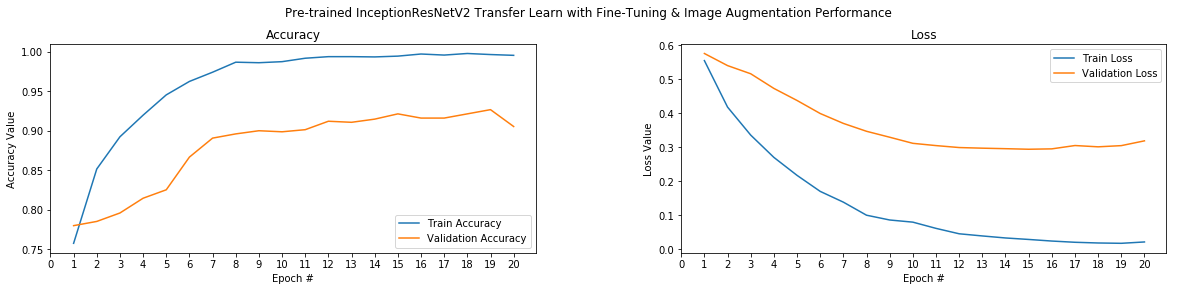

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
t = f.suptitle('Pre-trained InceptionResNetV2 Transfer Learn with Fine-Tuning & Image Augmentation Performance ', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,EPOCHS+1))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, EPOCHS+1, 1))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch #')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, EPOCHS+1, 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch #')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

True positive =  2954
False positive =  32
False negative =  53
True negative =  706




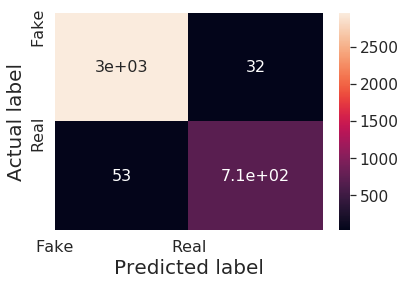

In [ ]:
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()

print_confusion_matrix(Y_val_org, model.predict_classes(X))

In [ ]:
model.save('deepfake-detection-model.h5')

In [ ]:
import tensorflow as tf
import dlib
import cv2
import os
import numpy as np
from PIL import Image, ImageChops, ImageEnhance
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [ ]:
tf.__version__

'2.1.0-rc0'

In [ ]:
model = load_model('deepfake-detection-model.h5')

In [ ]:
input_shape = (128, 128, 3)
pr_data = []
detector = dlib.get_frontal_face_detector()
cap = cv2.VideoCapture('../input/deepfake-detection-challenge/test_videos/jzmzdispyo.mp4')
frameRate = cap.get(5)
while cap.isOpened():
    frameId = cap.get(1)
    ret, frame = cap.read()
    if ret != True:
        break
    if frameId % ((int(frameRate)+1)*1) == 0:
        face_rects, scores, idx = detector.run(frame, 0)
        for i, d in enumerate(face_rects):
            x1 = d.left()
            y1 = d.top()
            x2 = d.right()
            y2 = d.bottom()
            crop_img = frame[y1:y2, x1:x2]
            data = img_to_array(cv2.resize(crop_img, (128, 128))).flatten() / 255.0
            data = data.reshape(-1, 128, 128, 3)
            print(model.predict_classes(data))

[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


In [ ]:
import sklearn.metrics
cm = sklearn.metrics.accuracy_score(Y_val_org, model.predict_classes(X))

In [ ]:
print(cm)

0.9773030707610146


In [ ]:
!pip install keras_efficientnets

from keras_efficientnets import EfficientNetB5

In [ ]:
!pip install efficientnet


In [ ]:
from efficientnet.tfkeras import EfficientNetB5
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten

input_shape = (128, 128, 3)
base_model = EfficientNetB5(include_top=False, weights="imagenet", input_shape=input_shape)
input_layer = Input(shape=input_shape)
x = base_model(input_layer, training=False)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
output_layer = Dense(2, activation='softmax')(x)


model1 = Model(inputs=input_layer, outputs=output_layer)
model1.summary()


115515392/115515256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
efficientnet-b5 (Model)      (None, 4, 4, 2048)        28513520  
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              33555456  
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
____________________________________________________________

In [ ]:
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
batch_size= 200
epochs=15
learn_rate=.001
sgd=SGD(learning_rate=learn_rate,momentum=.9,nesterov=False)
adam=Adam(learning_rate=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model1.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model1.fit(X_train,Y_train, batch_size = 100, epochs = 25, validation_data = (X_val,Y_val), verbose = 1)

Train on 2996 samples, validate on 749 samples
Epoch 1/25
2996/2996 [==============================] - 50s 17ms/sample - loss: 0.5019 - accuracy: 0.7774 - val_loss: 0.4694 - val_accuracy: 0.7864
Epoch 2/25
2996/2996 [==============================] - 21s 7ms/sample - loss: 0.4075 - accuracy: 0.8154 - val_loss: 0.4195 - val_accuracy: 0.8291
Epoch 3/25
2996/2996 [==============================] - 21s 7ms/sample - loss: 0.3364 - accuracy: 0.8525 - val_loss: 0.3786 - val_accuracy: 0.8358
Epoch 4/25
2996/2996 [==============================] - 21s 7ms/sample - loss: 0.2671 - accuracy: 0.8879 - val_loss: 0.3533 - val_accuracy: 0.8505
Epoch 5/25
2996/2996 [==============================] - 21s 7ms/sample - loss: 0.2357 - accuracy: 0.9015 - val_loss: 0.3110 - val_accuracy: 0.8825
Epoch 6/25
2996/2996 [==============================] - 21s 7ms/sample - loss: 0.1709 - accuracy: 0.9312 - val_loss: 0.2916 - val_accuracy: 0.8838
Epoch 7/25
2996/2996 [==============================] - 21s 7ms/sample

In [ ]:
import numpy as np

# Assuming model1.predict(X) returns probabilities for each class
probabilities = model1.predict(X)
predicted_classes = np.argmax(probabilities, axis=1)

# Now you can calculate accuracy
accuracy = sklearn.metrics.accuracy_score(Y_val_org, predicted_classes)
print("Accuracy:", accuracy)

Accuracy: 0.9802403204272363


In [ ]:
import h5py

In [ ]:
filename = "./deepfake-detection-model.h5"

h5 = h5py.File(filename,'r')
print(h5)
h5.close()

<HDF5 file "deepfake-detection-model.h5" (mode r)>


In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import SGD,Adam

In [ ]:
base_model = VGG16(include_top = False, weights = 'imagenet', input_shape = input_shape, classes = 2)
model= Sequential()
model.add(base_model)
model.add(Flatten())
model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
Total params: 14,714,688
Trainable params: 14,714,688
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(Dense(1024,activation=('relu'),input_dim=2))
model.add(Dense(512,activation=('relu')))
model.add(Dense(256,activation=('relu')))

model.add(Dense(128,activation=('relu')))
#model.add(Dropout(.2))
model.add(Dense(64,activation=('relu')))
model.add(Dense(32,activation=('relu')))
model.add(Dense(8,activation=('relu')))
#model.add(Dropout(.4))
model.add(Dense(2,activation=('softmax')))

#Checking the final model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              8389632   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 64)               

In [ ]:
batch_size= 200
epochs=15
learn_rate=.001
sgd=SGD(learning_rate=learn_rate,momentum=.9,nesterov=False)
adam=Adam(learning_rate=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,Y_train, batch_size = 500, epochs = 29, validation_data = (X_val,Y_val), verbose = 1)

Train on 2996 samples, validate on 749 samples
Epoch 1/29
2996/2996 [==============================] - 8s 3ms/step - loss: 0.3104 - accuracy: 0.8738 - val_loss: 0.4880 - val_accuracy: 0.7503
Epoch 2/29
2996/2996 [==============================] - 8s 3ms/step - loss: 0.3986 - accuracy: 0.8388 - val_loss: 0.3839 - val_accuracy: 0.8678
Epoch 3/29
2996/2996 [==============================] - 8s 3ms/step - loss: 0.3287 - accuracy: 0.8698 - val_loss: 0.3675 - val_accuracy: 0.8598
Epoch 4/29
2996/2996 [==============================] - 8s 3ms/step - loss: 0.2833 - accuracy: 0.8955 - val_loss: 0.2998 - val_accuracy: 0.8838
Epoch 5/29
2996/2996 [==============================] - 8s 3ms/step - loss: 0.2400 - accuracy: 0.9092 - val_loss: 0.2929 - val_accuracy: 0.8798
Epoch 6/29
2996/2996 [==============================] - 8s 3ms/step - loss: 0.2034 - accuracy: 0.9242 - val_loss: 0.2375 - val_accuracy: 0.8972
Epoch 7/29
2996/2996 [==============================] - 8s 3ms/step - loss: 0.1794 - accu

True positive =  2965
False positive =  21
False negative =  42
True negative =  717




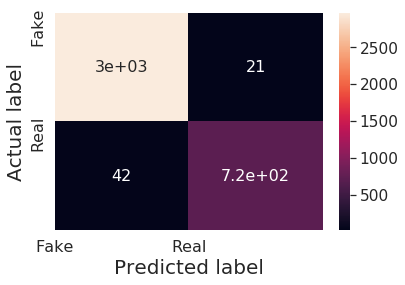

In [ ]:
print_confusion_matrix(Y_val_org, model.predict_classes(X))

In [ ]:
import sklearn.metrics
cm = sklearn.metrics.accuracy_score(Y_val_org, model.predict_classes(X))
print(cm)

0.983177570093458
